In [69]:
%matplotlib inline
from sklearn.datasets import fetch_lfw_people
# fetch_lfw_people (it allows to load a dataset of images)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

image_shape (87, 65)


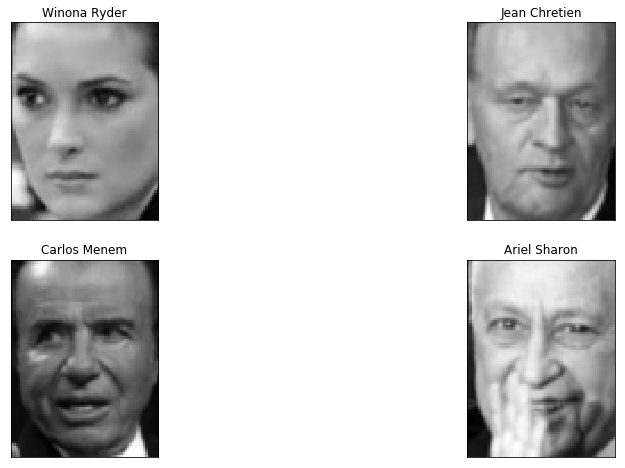

In [70]:
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape
print('image_shape',image_shape)
fig, axes = plt.subplots(2, 2, figsize=(15, 8),subplot_kw={'xticks': (), 'yticks': ()})
#'xticks': (), 'yticks': () deleting planes (x,y)
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image, cmap = 'gray')
    ax.set_title(people.target_names[target])

In [71]:
#Example
my_list = ['apple', 'banana', 'grapes', 'pear','apple']
for (c, value) in enumerate(my_list):
    print(c, value)

0 apple
1 banana
2 grapes
3 pear
4 apple


In [72]:
print("people.images.shape: {}".format(people.images.shape))
print("Number of classes: {}".format(len(people.target_names)))
# count how often each target appears
counts = np.bincount(people.target)
print('counts',counts[0:10])
# print counts next to target names:
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    #print ('i',i,'count',count)
    print("{0:25} {1:3}".format(name, count), end='   ')
    if (i + 1) % 3 == 0:
        print()

people.images.shape: (3023, 87, 65)
Number of classes: 62
counts [39 35 21 36 20 77 42 24 29 21]
Alejandro Toledo           39   Alvaro Uribe               35   Amelie Mauresmo            21   
Andre Agassi               36   Angelina Jolie             20   Ariel Sharon               77   
Arnold Schwarzenegger      42   Atal Bihari Vajpayee       24   Bill Clinton               29   
Carlos Menem               21   Colin Powell              236   David Beckham              31   
Donald Rumsfeld           121   George Robertson           22   George W Bush             530   
Gerhard Schroeder         109   Gloria Macapagal Arroyo    44   Gray Davis                 26   
Guillermo Coria            30   Hamid Karzai               22   Hans Blix                  39   
Hugo Chavez                71   Igor Ivanov                20   Jack Straw                 28   
Jacques Chirac             52   Jean Chretien              55   Jennifer Aniston           21   
Jennifer Capriati          42 

In [73]:
# To make the data less skewed, only take up to 50 images of each person
#np.bool Boolean (True or False) stored as a byte
mask = np.zeros(people.target.shape, dtype=np.bool) #se tienen un numero por cada personaje
print ('mask',mask,mask.shape)
print(people.target.shape)
#Find the unique elements of an array
print(np.unique(people.target))
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:60]] = 1 #I do not undertand very well

print('mask',mask)
print(people.data.shape) #85+27 es un vector por cada imagen
print(people.target)
    
#Each row corresponds to a ravelled face image of original size 62 x 47 pixels    
X_people = people.data[mask] #coloca todas las imagenes
y_people = people.target[mask] #

# scale the grey-scale values to be between 0 and 1
# instead of 0 and 255 for better numeric stability:
X_people = X_people / 255.
print(X_people.shape)

mask [False False False ... False False False] (3023,)
(3023,)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61]
mask [ True  True  True ... False False False]
(3023, 5655)
[61 25  9 ... 14 15 14]
(2155, 5655)


In [74]:
#1NN classifier
from sklearn.neighbors import KNeighborsClassifier   #clasificado de vecinos más cercanos
# split the data in training and test set
X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=0)
#This is to check and validate the data when running the code multiple times. Setting random_state a
#fixed value will guarantee that same sequence of random numbers are generated each time you run the code
# build a KNeighborsClassifier with using one neighbor:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)  # se entrena el algorimos
print("Test set score of 1-nn: {:.2f}".format(knn.score(X_test, y_test))) # semide desempñeo con el metodo score

Test set score of 1-nn: 0.24


In [75]:
#We enable the whitening option of PCA: Use standardScaler after the 
#transformation. Fit the PCA object and extract the first 100 principal components
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
#whiten(ajusta la informacion redondita, porque antes esta estirada)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("X_train_pca.shape: {}".format(X_train_pca.shape))

X_train_pca.shape: (1616, 100)


In [76]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print("Test set accuracy: {:.2f}".format(knn.score(X_test_pca, y_test)))

Test set accuracy: 0.33


In [77]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=0.1)
lr.fit(X_train_pca, y_train)
print("LR test set accuracy: {:.2f}".format(lr.score(X_test_pca, y_test)))

LR test set accuracy: 0.51


In [78]:
from sklearn.svm import LinearSVC
lsvc = LinearSVC(C=0.05)
lsvc.fit(X_train_pca, y_train)
print("LSVC test set accuracy: {:.2f}".format(lsvc.score(X_test_pca, y_test)))

LSVC test set accuracy: 0.50


In [79]:
print("pca.components_.shape: {}".format(pca.components_.shape))

pca.components_.shape: (100, 5655)


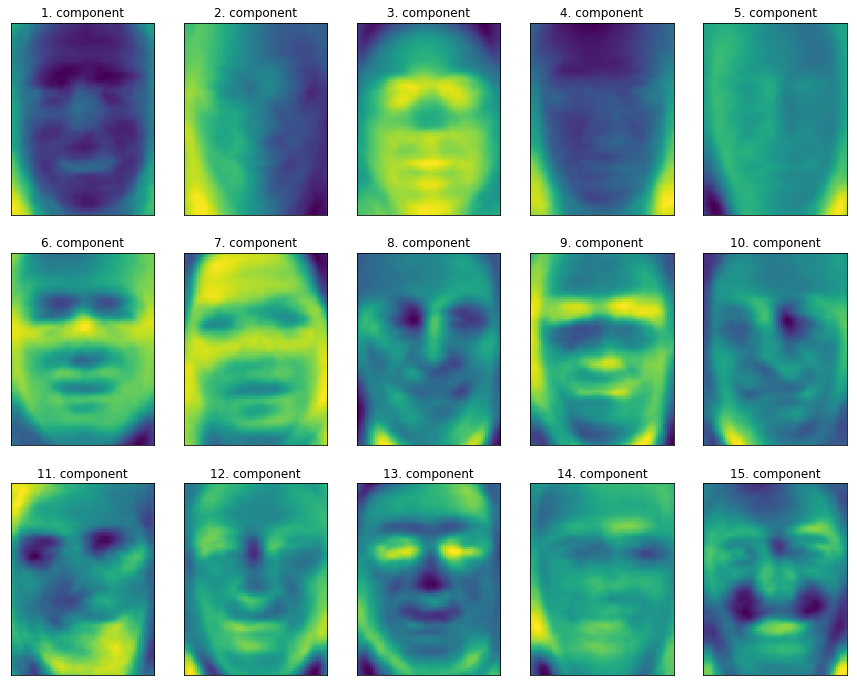

In [80]:
#For this case, I am using just the principal components, I am not multiplying the principal component with the
#original image
fig, axes = plt.subplots(3, 5, figsize=(15, 12),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape),
              cmap='viridis')
    ax.set_title("{}. component".format((i + 1)))

In [81]:
#An MLP
from __future__ import absolute_import, division, print_function
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
# Helper libraries
print(tf.__version__)

1.11.0


In [82]:
#Build the model
model_img = keras.Sequential([
    keras.layers.Flatten(input_shape=(87, 65)),
    keras.layers.Dense(248, activation=tf.nn.relu),
    keras.layers.Dense(124, activation=tf.nn.relu),
    keras.layers.Dense(62, activation=tf.nn.softmax)
])

In [83]:
#Build the pca model 
model_pca = keras.Sequential([
    keras.layers.Dense(248, activation=tf.nn.relu),
    keras.layers.Dense(124, activation=tf.nn.relu),
    keras.layers.Dense(62, activation=tf.nn.softmax)
])

In [84]:
# Compile the model
model_img.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Compile the pca-based model
model_pca.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [85]:
# Reshape dataset
X_train_img = X_train.reshape((X_train.shape[0],image_shape[0],image_shape[1]))
X_test_img = X_test.reshape((X_test.shape[0],image_shape[0],image_shape[1]))
print(X_train_pca.shape)
print(X_train_img.shape)

(1616, 100)
(1616, 87, 65)


In [86]:
model_img.fit(X_train_img, y_train, epochs=10)

Epoch 1/10
1616/1616 [==============================] - 2s 1ms/step - loss: 4.3036 - acc: 0.0316
Epoch 2/10
1616/1616 [==============================] - 1s 901us/step - loss: 4.0856 - acc: 0.0347
Epoch 3/10
1616/1616 [==============================] - 1s 889us/step - loss: 3.9939 - acc: 0.0514
Epoch 4/10
1616/1616 [==============================] - 1s 880us/step - loss: 3.9108 - acc: 0.0452
Epoch 5/10
1616/1616 [==============================] - 2s 1ms/step - loss: 3.7573 - acc: 0.0774
Epoch 6/10
1616/1616 [==============================] - 2s 1ms/step - loss: 3.6771 - acc: 0.0903
Epoch 7/10
1616/1616 [==============================] - 2s 985us/step - loss: 3.5498 - acc: 0.0972
Epoch 8/10
1616/1616 [==============================] - 1s 842us/step - loss: 3.3953 - acc: 0.1306
Epoch 9/10
1616/1616 [==============================] - 2s 944us/step - loss: 3.2478 - acc: 0.1640
Epoch 10/10
1616/1616 [==============================] - 2s 992us/step - loss: 3.1371 - acc: 0.1819


In [87]:
#Train the model 
model_pca.fit(X_train_pca, y_train, epochs=10)

Epoch 1/10
1616/1616 [==============================] - 1s 390us/step - loss: 4.0713 - acc: 0.0514
Epoch 2/10
1616/1616 [==============================] - 0s 120us/step - loss: 3.3817 - acc: 0.2692
Epoch 3/10
1616/1616 [==============================] - 0s 123us/step - loss: 2.5078 - acc: 0.4746
Epoch 4/10
1616/1616 [==============================] - 0s 109us/step - loss: 1.6388 - acc: 0.6795
Epoch 5/10
1616/1616 [==============================] - 0s 128us/step - loss: 1.0633 - acc: 0.7946
Epoch 6/10
1616/1616 [==============================] - 0s 127us/step - loss: 0.6856 - acc: 0.8929
Epoch 7/10
1616/1616 [==============================] - 0s 109us/step - loss: 0.4496 - acc: 0.9480
Epoch 8/10
1616/1616 [==============================] - 0s 100us/step - loss: 0.2994 - acc: 0.9771
Epoch 9/10
1616/1616 [==============================] - 0s 102us/step - loss: 0.1994 - acc: 0.9932
Epoch 10/10
1616/1616 [==============================] - 0s 90us/step - loss: 0.1367 - acc: 0.9975


In [88]:
#Evaluate accuracy
test_loss, test_acc = model_img.evaluate(X_test_img, y_test)
print('Test accuracy on raw images:', test_acc)
test_loss_pca, test_acc_pca = model_pca.evaluate(X_test_pca, y_test)
print('Test accuracy on pca-transformed data:', test_acc_pca)

539/539 [==============================] - 0s 321us/step
Test accuracy on raw images: 0.15398886832987443
539/539 [==============================] - 0s 185us/step
Test accuracy on pca-transformed data: 0.49165120610279583
